**линейная регрессия, градиентный спуск**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
n_samples=500

X = np.linspace(-1,1,n_samples).reshape(-1,1)
y = np.sin((X)*2.9)+np.random.rand(n_samples).reshape(-1,1)

y = y.flatten()

X.shape,y.shape

((500, 1), (500,))

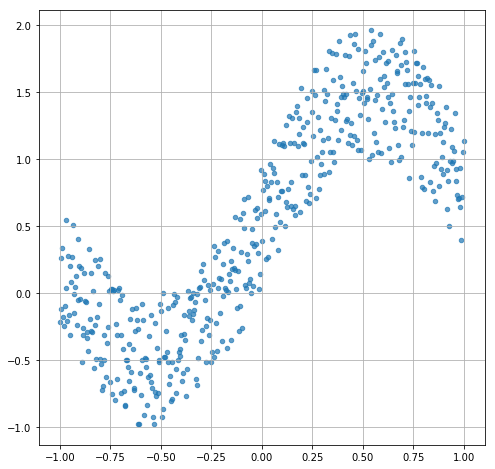

In [3]:
# рисуем исходные данные
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [4]:
# масштабируем признаки в [-1,1]
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

In [5]:
Xp = np.hstack([np.ones([n_samples,1]),X]) # добавляем столбец из единиц (свободный член)

---

In [6]:
# инициализация параметров
n_param = Xp.shape[1]

# T = np.random.rand(n_param)
T = np.array( [0] + [1]*(n_param-1) )
T.shape

(2,)

In [7]:
%%time

# метод градиентного спуска

a=1e-1 # скорость обучени
ex_count = Xp.shape[0]   # количество примеров

MAX_ITER = 500 # максимальное число циклов обучения
MIN_ERROR = 0.14 # порог минимальной ошибки

ex_count_div = 1.0/(2.0*ex_count)

er_hist=[]
    
for i in range(MAX_ITER):
    O = Xp.dot(T) # выход
    E = O - y # ошибка
    
    er = ex_count_div*E.dot(E.T) # средняя квадратичная ошибка
    er_hist.append(er)
    
    if er < MIN_ERROR: # проверяем достижение порога
        print('step %i/%i: error bound %.03f'%(i+1,MAX_ITER,er))
        break
    
    dT = ex_count_div*Xp.T.dot(E) # изменение весов
    
    T = T - a*dT # корректируем параметры
    


step 15/500: error bound 0.137
CPU times: user 1.17 ms, sys: 144 µs, total: 1.32 ms
Wall time: 1.33 ms


In [8]:
print(T)
print(er)

[0.26477771 1.02716368]
0.13689937615373596


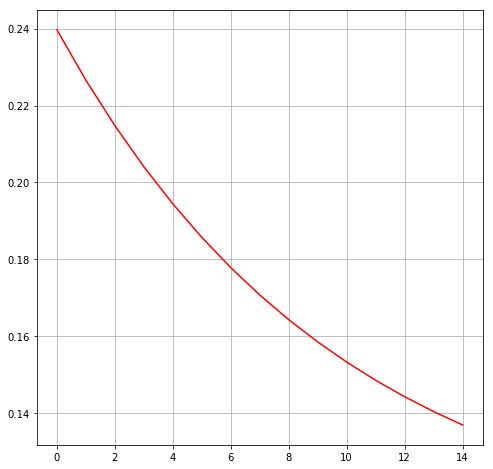

In [9]:
# рисуем изменение ф-ции потери
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.plot(range(len(er_hist)),er_hist,'-r')
plt.grid()
plt.show()

In [10]:
# вектор-столбец крайние значения признака
xx = np.array([ X.min(), X.max(), ]).reshape((2,1)) 

# значение регрессии для xx
yy = np.hstack([np.ones([2,1]),xx]).dot(T)


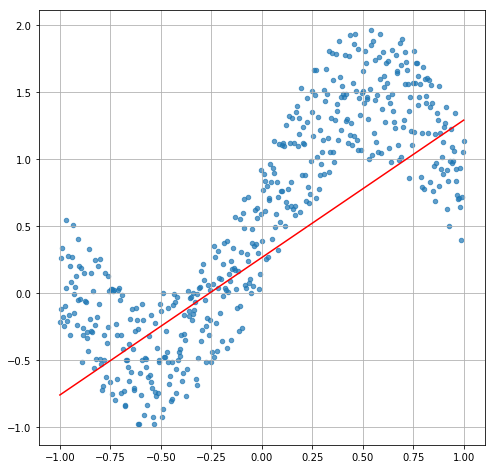

In [11]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()